# Algoritmo Metaheurísticos: Práctica 4
Profesor: Dr. Marco Aceves <br>
Alumno: Ing. Enrique Mena Camilo

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm


## Configuración de experimento

In [2]:
periodo_produccion = 30
max_toneladas = 10
periodo_multa = int(periodo_produccion/2)
kilos_dia = max_toneladas * 1000
kilos_produccion = 50 * max_toneladas * 1000
multa_maxima = 10_000 * periodo_produccion 
porcentaje_multa = multa_maxima * 40
numero_individuos = 1_000
corte_para_cruce = int(periodo_produccion/2)
porcentaje = 10
porcentaje_mutacion = 0.1


In [3]:
genes = [
    {"Gen": 1, "Codigo Color": 0, "Color": "Blanco", "Grosor": 1, "Costo": 4, "Precio": 8, 
        "Ganancia": 4, "Peso": 0.1, "Produccion al Dia": int(kilos_dia/0.1), "Ganancia al Dia": int(kilos_dia/0.1)*4},
    {"Gen": 2, "Codigo Color": 0, "Color": "Blanco", "Grosor": 2, "Costo": 9, "Precio": 18, 
        "Ganancia": 9, "Peso": 0.2, "Produccion al Dia": int(kilos_dia/0.2), "Ganancia al Dia": int(kilos_dia/0.2)*4},
    {"Gen": 3, "Codigo Color": 1, "Color": "Azul", "Grosor": 1, "Costo": 3, "Precio": 6, 
        "Ganancia": 3, "Peso": 0.1, "Produccion al Dia": int(kilos_dia/0.1), "Ganancia al Dia": int(kilos_dia/0.1)*4},
    {"Gen": 4, "Codigo Color": 1, "Color": "Azul", "Grosor": 2, "Costo": 7, "Precio": 14, 
        "Ganancia": 7, "Peso": 0.2, "Produccion al Dia": int(kilos_dia/0.2), "Ganancia al Dia": int(kilos_dia/0.2)*4},
    {"Gen": 5, "Codigo Color": 2, "Color": "Negro", "Grosor": 1, "Costo": 2, "Precio": 4, 
        "Ganancia": 2, "Peso": 0.1, "Produccion al Dia": int(kilos_dia/0.1), "Ganancia al Dia": int(kilos_dia/0.1)*4},
    {"Gen": 6, "Codigo Color": 2, "Color": "Negro", "Grosor": 2, "Costo": 5, "Precio": 10, 
        "Ganancia": 5, "Peso": 0.2, "Produccion al Dia": int(kilos_dia/0.2), "Ganancia al Dia": int(kilos_dia/0.2)*4},
]
genes = pd.DataFrame(genes)
genes


,Gen,Codigo Color,Color,Grosor,Costo,Precio,Ganancia,Peso,Produccion al Dia,Ganancia al Dia
0,1,0,Blanco,1,4,8,4,0.1,100000,400000
1,2,0,Blanco,2,9,18,9,0.2,50000,200000
2,3,1,Azul,1,3,6,3,0.1,100000,400000
3,4,1,Azul,2,7,14,7,0.2,50000,200000
4,5,2,Negro,1,2,4,2,0.1,100000,400000
5,6,2,Negro,2,5,10,5,0.2,50000,200000


## Población

In [4]:
def generar_listas_azar(periodo_produccion=periodo_produccion, numero_individuos=numero_individuos):
    lista_listas = []
    for i in range(numero_individuos):
        lista_individuo = []
        for z in range(periodo_produccion):
            numero = random.randint(1, 6)
            lista_individuo.append(numero)
        lista_listas.append(lista_individuo)
    return lista_listas


## Aptitud

In [5]:
def calcular_aptitud(lista_individuo):
    aptitud = 0
    cuenta_produccion = 0
    cuenta_blanco = 0
    cuenta_azul = 0
    cuenta_negro = 0
    for x in range(len(lista_individuo)):
        color_actual = genes.loc[lista_individuo[x]-1, 'Color']
        aptitud += genes.loc[lista_individuo[x]-1, 'Ganancia al Dia']
        if x != 0:
            if color_actual ==    color_anterior:
                pass
            else:
                if color_actual == 'Blanco':
                    if color_anterior == 'Azul':
                        aptitud -= int(multa_maxima/4)
                    elif color_anterior == 'Negro':
                        aptitud -= int(multa_maxima/2)
                elif color_actual == 'Azul':
                    if color_anterior == 'Blanco':
                        aptitud -= int(multa_maxima/4)
                    elif color_anterior == 'Negro':
                        aptitud -= int(multa_maxima/4)
                elif color_actual == 'Negro':
                    if color_anterior == 'Azul':
                        aptitud -= int(multa_maxima/4)
                    elif color_anterior == 'Blanco':
                        aptitud -= int(multa_maxima/4)
        color_anterior = genes.loc[lista_individuo[x]-1, 'Color']
        if x <= periodo_multa:
            cuenta_produccion += genes.loc[lista_individuo[x]-1, 'Produccion al Dia']
            if color_actual == 'Blanco':
                cuenta_blanco += genes.loc[lista_individuo[x]-1, 'Produccion al Dia']
            elif color_actual == 'Azul':
                cuenta_azul += genes.loc[lista_individuo[x]-1, 'Produccion al Dia']
            elif color_actual == 'Negro':
                cuenta_negro += genes.loc[lista_individuo[x]-1, 'Produccion al Dia']
    porcentaje_blanco = (cuenta_blanco*100)/cuenta_produccion
    porcentaje_azul = (cuenta_azul*100)/cuenta_produccion
    porcentaje_negro = (cuenta_negro*100)/cuenta_produccion
    if (porcentaje_blanco <= porcentaje or porcentaje_azul <= porcentaje or porcentaje_negro <= porcentaje):
        aptitud -= porcentaje_multa
    return aptitud


def promedio_top_10(dataframe: object):
    suma = 0
    for x in range(int(dataframe.shape[0]*.1)):
        suma += dataframe.loc[x, 'Aptitud']
    promedio = suma/int(dataframe.shape[0]*.1)
    return promedio


def promedio_low_10(dataframe: object):
    suma = 0
    for x in range(int(dataframe.shape[0]*.9), dataframe.shape[0]):
        suma += dataframe.loc[x, 'Aptitud']
    promedio = suma/int(dataframe.shape[0]*.1)
    return promedio


## Selección

In [6]:
def ordenar_df_aptitud(dataframe: object):
    df_ordenado = dataframe.sort_values(by='Aptitud', axis=0, ascending=False)
    df_ordenado = df_ordenado.reset_index(drop=True)
    return df_ordenado


def seleccion_azar_monogamica(dataframe: object):
    padres_posibles = []
    parejas_azar = []
    for i in range(dataframe.shape[0]):
        padres_posibles.append(dataframe.loc[i, "Lista"])     
    while len(padres_posibles) > 0:
        padre1 = random.choice(padres_posibles)
        padres_posibles.pop(padres_posibles.index(padre1))
        padre2 = random.choice(padres_posibles)
        padres_posibles.pop(padres_posibles.index(padre2))
        parejas_azar.append((padre1, padre2))
    return parejas_azar


def seleccion_torneo(dataframe: object):
    dataframe = ordenar_df_aptitud(dataframe)
    padres_posibles = []
    parejas_torneo = []
    for i in range(dataframe.shape[0]):
        padres_posibles.append(dataframe.loc[i, "Lista"])
    for i in range(int(dataframe.shape[0]/2)):
        padre1 = padres_posibles[i]
        padre2 = padres_posibles[len(padres_posibles)-i-1]
        parejas_torneo.append((padre1, padre2))
    return parejas_torneo


## Cruza

In [7]:
def cruza_2cortes(padres: list):
    hijos_cruza_2cortes = []
    padres_con_hijos = []
    padres_sin_tupla = []
    for tupla in padres:
        padre1 = tupla[0]
        padre2 = tupla[1]
        corte_para_cruce1 = int(len(padre1)/3)
        corte_para_cruce2 = corte_para_cruce1 * 2
        hijo1 = []
        hijo2 = []
        hijo1 = [*padre1[:corte_para_cruce1], *padre2[corte_para_cruce1:corte_para_cruce2], *padre1[corte_para_cruce2:]]
        hijo2 = [*padre2[:corte_para_cruce1], *padre1[corte_para_cruce1:corte_para_cruce2], *padre2[corte_para_cruce2:]]
        hijos_cruza_2cortes.append(hijo1)
        hijos_cruza_2cortes.append(hijo2)
    for tupla in padres:
        padres_sin_tupla.append(tupla[0])
        padres_sin_tupla.append(tupla[1])
    padres_con_hijos.extend(padres_sin_tupla)
    padres_con_hijos.extend(hijos_cruza_2cortes)
    return padres_con_hijos


def cruza_1corte(padres: list):
    hijos_cruza_1corte = []
    padres_con_hijos = []
    padres_sin_tupla = []
    for tupla in padres:
        padre1 = tupla[0]
        padre2 = tupla[1]
        hijo1 = []
        hijo2 = []
        hijo2 = padre1[:corte_para_cruce]
        hijo2.extend(padre2[corte_para_cruce:])
        hijo1 = padre2[:corte_para_cruce]
        hijo1.extend(padre1[corte_para_cruce:])
        hijos_cruza_1corte.append(hijo2)
        hijos_cruza_1corte.append(hijo1)
    for tupla in padres:
        padres_sin_tupla.append(tupla[0])
        padres_sin_tupla.append(tupla[1])
    padres_con_hijos.extend(padres_sin_tupla)
    padres_con_hijos.extend(hijos_cruza_1corte)
    return padres_con_hijos


## Mutación

In [8]:
def generar_dataframe_de_lista(lista_de_listas_individuo):
    dataframe = pd.DataFrame()
    dataframe['Lista'] = lista_de_listas_individuo
    dataframe['Aptitud'] = [calcular_aptitud(x) for x in lista_de_listas_individuo]
    return dataframe


def mutacion_scramble2(dataframe: object, porcentaje: float):
    renglones_dataframe = dataframe.shape[0]
    numero_individuos = int(renglones_dataframe*porcentaje)
    indices_a_mutar = []
    lista_para_muta = []
    individuos_mutados = []
    indices_dataframe = list(range(renglones_dataframe))
    for i in range(numero_individuos):
        indices_a_mutar.append(indices_dataframe[::-1][i])
    indices_a_mutar.reverse()

    for i in range(dataframe.shape[0]):
        lista_para_muta.append(dataframe.loc[i, 'Lista'])
    maximo_slice = int(len(lista_para_muta[0])/3)
    corte1 = random.randint(0,len(lista_para_muta[0])-maximo_slice)
    corte2 = corte1 + maximo_slice - 1
    lista_indices = list(range(len(lista_para_muta[0])))
    lista_indices_cortes = list(range(corte1,corte2 + 1))
    lista_indices_diferencia = [i for i in lista_indices if not i in lista_indices_cortes]
    lista_sin_corte1 = [i for i in list(range(len(lista_indices)-maximo_slice+1)) if i != corte1]
    indice = random.choice(lista_sin_corte1)


    for i in range(len(lista_para_muta)):
        individuo = lista_para_muta[i]
        if i in indices_a_mutar:
            individuo_unido = []
            individuo_subcadena = []
            individuo_unido = [individuo[x] for x in lista_indices_diferencia]
            individuo_subcadena = [individuo[x] for x in lista_indices_cortes]
            #unirlos en otra que no sea corte1
            random.shuffle(individuo_subcadena)
            individuo_unido[indice:indice] = individuo_subcadena
            individuos_mutados.append(individuo_unido)
        else:
          individuos_mutados.append(individuo)
    nuevo_dataframe = generar_dataframe_de_lista(individuos_mutados)
    return nuevo_dataframe


## Competencia genética

In [9]:
def competencia_genetica(dataframe: object):
    dataframe = ordenar_df_aptitud(dataframe)
    dataframe.drop(dataframe.index[int(dataframe.shape[0]/2):dataframe.shape[0]], axis=0, inplace=True)
    return dataframe


## Topología multi-islas

In [10]:
def cambiar_10_porciento(dataframe: object, dataframe2: object):
    for x in range(int(dataframe.shape[0]*.9), dataframe.shape[0]):
        dataframe.loc[x, 'Aptitud'] = dataframe2.loc[x-900, 'Aptitud']
        dataframe.iloc[[x, 0]] = dataframe2.loc[[x-900, 0]]
    return dataframe


## Algoritmo genético

Generación: 100%|██████████| 20/20 [02:15<00:00,  6.75s/it]


Mejores: 11250000-11175000-11550000
Promedio top 10: 11160750.0-10767000.0-11403000.0


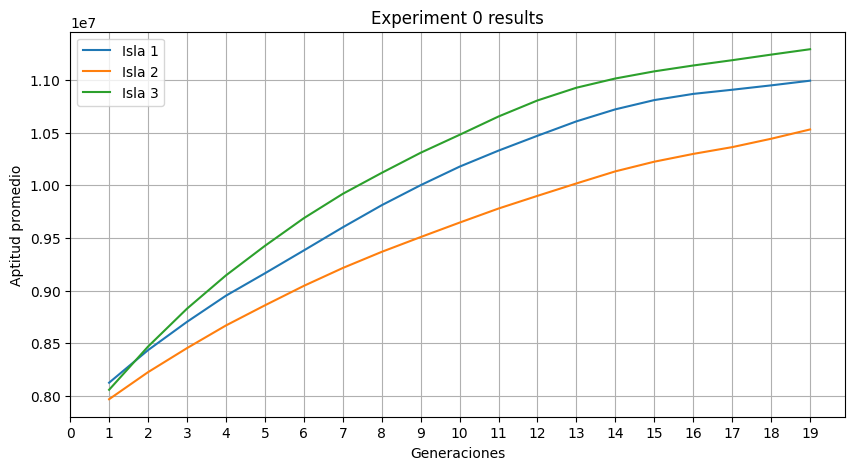

Generación: 100%|██████████| 20/20 [02:16<00:00,  6.83s/it]


Mejores: 11275000-11200000-11400000
Promedio top 10: 10997500.0-10933250.0-11194000.0


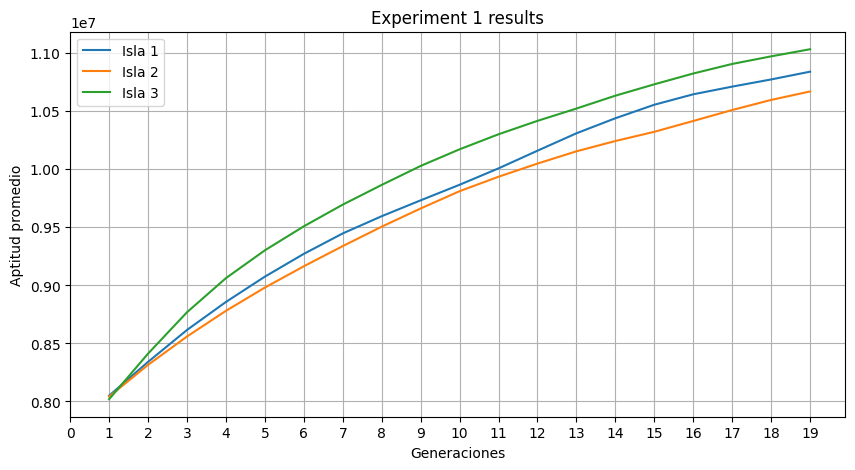

Generación: 100%|██████████| 20/20 [02:17<00:00,  6.87s/it]


Mejores: 11475000-11325000-11325000
Promedio top 10: 11184250.0-11282250.0-11325000.0


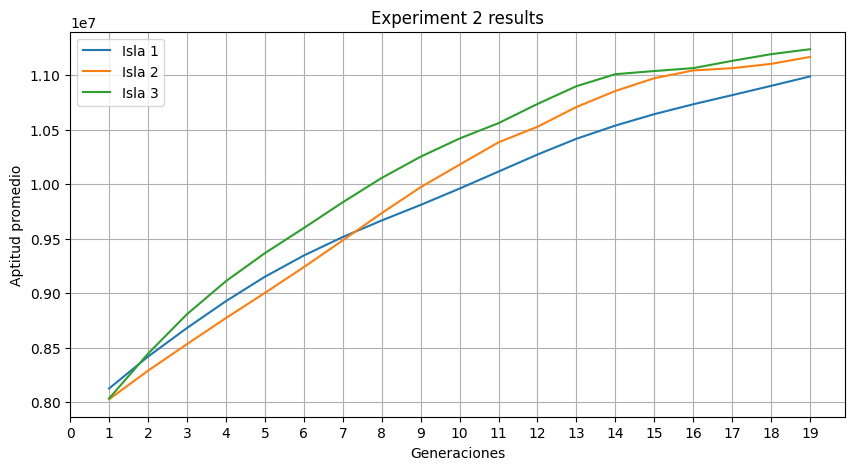

In [11]:
generaciones = 20
promedio = 0
mejor_individuo = 0

for exp_ in range(3):
    promedio_isla_1 = []
    promedio_isla_2 = []
    promedio_isla_3 = []
    generaciones_lista = []
    for generacion in tqdm(range(1, generaciones + 1), desc='Generación'):
        if generacion == 1:
            # I1: Monogamica-1Corte-Scramble
            lista_individuos = generar_listas_azar()
            dataframe = generar_dataframe_de_lista(lista_individuos)
            padres = seleccion_azar_monogamica(dataframe)
            padres_con_hijos = cruza_1corte(padres)
            dataframe_nuevo = generar_dataframe_de_lista(padres_con_hijos)
            dataframe_nuevo = competencia_genetica(dataframe_nuevo)
            # I2: Torneo-2Cortes-Scramble
            lista_individuos2 = generar_listas_azar()
            dataframe2 = generar_dataframe_de_lista(lista_individuos2)
            padres2 = seleccion_torneo(dataframe2)
            padres_con_hijos2 = cruza_2cortes(padres2)
            dataframe_nuevo2 = generar_dataframe_de_lista(padres_con_hijos2)
            dataframe_nuevo2 = competencia_genetica(dataframe_nuevo2)
            # I3: Torneo-2Cortes-Scramble
            lista_individuos3 = generar_listas_azar()
            dataframe3 = generar_dataframe_de_lista(lista_individuos3)
            padres3 = seleccion_torneo(dataframe3)
            padres_con_hijos3 = cruza_2cortes(padres3)
            dataframe_nuevo3 = generar_dataframe_de_lista(padres_con_hijos3)
            dataframe_nuevo3 = competencia_genetica(dataframe_nuevo3)
        else:
            # I1: Monogamica-1Corte-Scramble
            padres = seleccion_azar_monogamica(dataframe_nuevo)
            padres_con_hijos = cruza_1corte(padres)
            dataframe_nuevo = generar_dataframe_de_lista(padres_con_hijos)
            dataframe_nuevo = mutacion_scramble2(dataframe_nuevo, porcentaje_mutacion)
            dataframe_nuevo = competencia_genetica(dataframe_nuevo)
            promedio = dataframe_nuevo["Aptitud"].mean()
            mejor_individuo = dataframe_nuevo.loc[0, 'Aptitud']
            promedio_10_mejores = promedio_top_10(dataframe_nuevo)
            promedio_10_peores = promedio_low_10(dataframe_nuevo)
            # I2: Torneo-2Cortes-Scramble
            padres2 = seleccion_torneo(dataframe_nuevo2)
            padres_con_hijos2 = cruza_2cortes(padres2)
            dataframe_nuevo2 = generar_dataframe_de_lista(padres_con_hijos2)
            dataframe_nuevo2 = mutacion_scramble2(dataframe_nuevo2, porcentaje_mutacion)
            dataframe_nuevo2 = competencia_genetica(dataframe_nuevo2)
            promedio2 = dataframe_nuevo2["Aptitud"].mean()
            mejor_individuo2 = dataframe_nuevo2.loc[0, 'Aptitud']
            promedio_10_mejores2 = promedio_top_10(dataframe_nuevo2)
            promedio_10_peores2 = promedio_low_10(dataframe_nuevo2)
            # I3: Torneo-2Cortes-Scramble
            padres3 = seleccion_torneo(dataframe_nuevo3)
            padres_con_hijos3 = cruza_2cortes(padres3)
            dataframe_nuevo3 = generar_dataframe_de_lista(padres_con_hijos3)
            dataframe_nuevo3 = mutacion_scramble2(dataframe_nuevo3, porcentaje_mutacion)
            dataframe_nuevo3 = competencia_genetica(dataframe_nuevo3)
            promedio3 = dataframe_nuevo3["Aptitud"].mean()
            mejor_individuo3 = dataframe_nuevo3.loc[0, 'Aptitud']
            promedio_10_mejores3 = promedio_top_10(dataframe_nuevo3)
            promedio_10_peores3 = promedio_low_10(dataframe_nuevo3)

            if not ((promedio_10_peores3 > promedio_10_mejores2 and promedio_10_peores3 > promedio_10_mejores)):
                if promedio_10_mejores > promedio_10_mejores2:
                    cambiar_10_porciento(dataframe_nuevo3, dataframe_nuevo)
                else:
                    cambiar_10_porciento(dataframe_nuevo3, dataframe_nuevo2)

            promedio_isla_1.append(promedio)
            promedio_isla_2.append(promedio2)
            promedio_isla_3.append(promedio3)
            generaciones_lista.append(generacion)

        dataframe_nuevo = ordenar_df_aptitud(dataframe_nuevo)
        dataframe_nuevo2 = ordenar_df_aptitud(dataframe_nuevo2)
        dataframe_nuevo3 = ordenar_df_aptitud(dataframe_nuevo3)

    print(f'Mejores: {mejor_individuo}-{mejor_individuo2}-{mejor_individuo3}')
    print(f'Promedio top 10: {promedio_10_mejores}-{promedio_10_mejores2}-{promedio_10_mejores3}')

    plt.figure(figsize=(10, 5))
    title = f'Experiment {exp_} results'
    plt.title(title)
    plt.plot([_-1 for _ in generaciones_lista], promedio_isla_1, label='Isla 1')
    plt.plot([_-1 for _ in generaciones_lista], promedio_isla_2, label='Isla 2')
    plt.plot([_-1 for _ in generaciones_lista], promedio_isla_3, label='Isla 3')
    plt.xlabel('Generaciones')
    plt.ylabel('Aptitud promedio')
    plt.xticks(range(generaciones))
    plt.legend()
    plt.grid()
    plt.savefig(f"./figures/{'_'.join(title.replace('+', '').lower().split())}.png", bbox_inches='tight')
    plt.show()
